In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.neighbors import radius_neighbors_graph
import networkx as nx
import pygraphviz as pgv
import scipy
import numpy as np

In [41]:
data_path = '/home/avsngh/Mathematical Statistics/Masters-Projects/Unsupervised-Learning/Data/Star_Data.txt'
data = pd.read_csv(filepath_or_buffer=data_path, sep='\s+', header=None)
data.columns = ['col1','col2']
data_df=pd.DataFrame.from_dict(data)
data_df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_907/159696598.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(filepath_or_buffer=data_path, sep='\s+', header=None)


,col1,col2
0,5.19535,-0.391847
1,2.12696,-0.348876
2,3.25733,-0.306237
3,-5.04634,-0.206221
4,-4.42945,0.635461
...,...,...
295,3.67002,7.279940
296,4.12115,4.639100
297,3.32121,3.888330
298,3.87897,5.469400


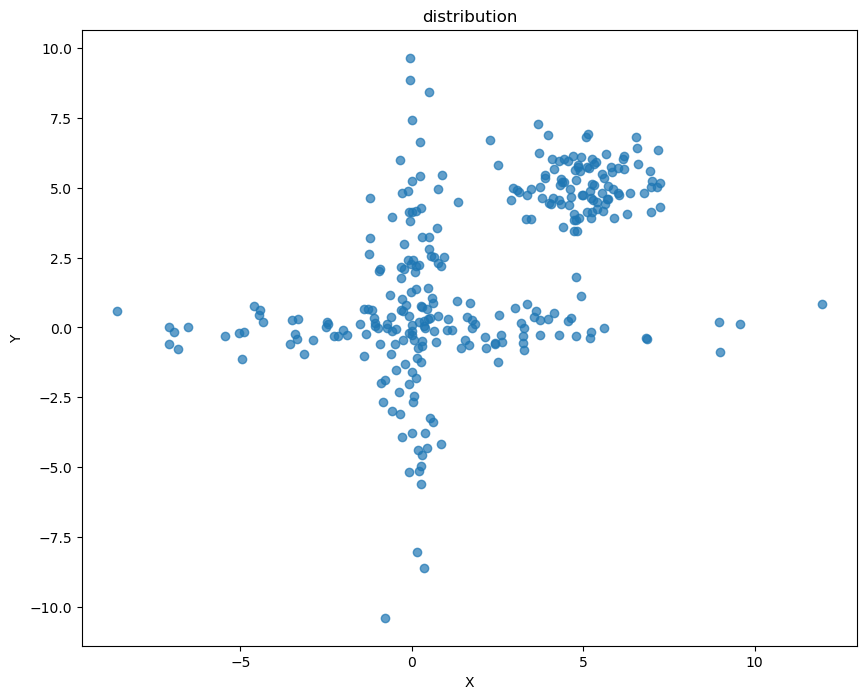

In [71]:
plt.figure(figsize=(10,8))
plt.scatter(data_df['col1'], data_df['col2'], marker='o', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('distribution')
plt.show()


## Creating ε neighbourhood graph

In [43]:
epsilon = 1.5
sim_matrix = radius_neighbors_graph(X=data_df, radius= epsilon, mode='distance', metric='euclidean', n_jobs=-1)

In [44]:
print(sim_matrix.getrow(4))

  (0, 65)	1.3984427854853412
  (0, 9)	1.3450742858682565
  (0, 48)	1.496699105724327
  (0, 3)	1.0435429369335982
  (0, 25)	0.9379410647796587
  (0, 71)	1.0178618074886199
  (0, 40)	1.1669890704561035
  (0, 45)	0.45366430076544484
  (0, 10)	0.17996734291531902
  (0, 35)	0.22666018379062497


In [66]:
# using networkx library we create a graph which we will visualize in the next step
nx_graph = nx.from_scipy_sparse_array(sim_matrix)
coordinates_dict={}
coordinates_dict = {i: [data_df.at[i, 'col1'], data_df.at[i, 'col2']] for i in range(len(data))}


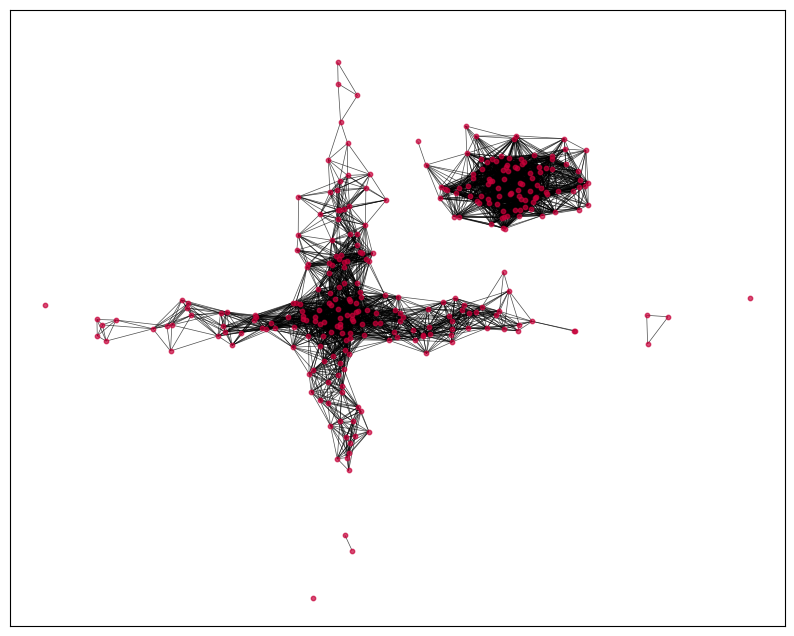

In [70]:
plt.figure(figsize=(10, 8))
nx.draw_networkx(G=nx_graph,pos=coordinates_dict, with_labels= False, node_size = 10, node_color= '#C70039', alpha = 0.7, width =0.5)

plt.show()

In [131]:
def create_degree_matrix(csr_weight_matrix):
    number_of_vertices = sim_matrix.get_shape()[0]
    degree_sums = []
    for i in range(number_of_vertices):
        degree = scipy.sparse.csr_matrix.sum(csr_weight_matrix.getcol(i))
        degree_sums.append(degree)
    degree_matrix = np.diag(degree_sums)
    return degree_matrix

def eigenspace_calculation(matrix, k: int = 1):
    eigenvals,eigenvects = scipy.sparse.linalg.eigs(matrix, k=k, which='SM')
    return eigenvals, eigenvects


In [127]:
degree_matrix = create_degree_matrix(sim_matrix)
sim_matrix_numpy = sim_matrix.toarray()
sim_matrix_numpy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.13117391, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.13117391, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.61727384],
       [0.        , 0.        , 0.        , ..., 0.        , 0.61727384,
        0.        ]])

In [128]:
unnorm_laplacian_matrix=degree_matrix-sim_matrix

In [149]:
eigenvals,eigenvects = eigenspace_calculation(matrix=unnorm_laplacian_matrix, k=4)

In [152]:
eigenvals[2]


(1.2385948068451888e-15+0j)

In [137]:
epsilon = 1e-12

# Count eigenvalues close to zero
zero_eigenvalues = np.sum(np.abs(eigenvals) < epsilon)
print(f"Number of zero eigenvalues: {zero_eigenvalues}")

Number of zero eigenvalues: 7
